# Bike Rental 

In [47]:
#loading all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import os
from sklearn.metrics import r2_score
from scipy import stats
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

In [48]:
#Creating the working directory
os.chdir("C:/Users/Nitish Rohilla/Desktop/other")

In [49]:
#Loadin the data set into the Environent
dt=pd.read_csv("day.csv",index_col=0)

# --------------Performing the Exploratory Data Analysis----------

In [50]:
dt.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [51]:
dt.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [52]:
dt.nunique()

dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [53]:
dt.shape

(731, 15)

Text(0, 0.5, 'Count of rented bikes')

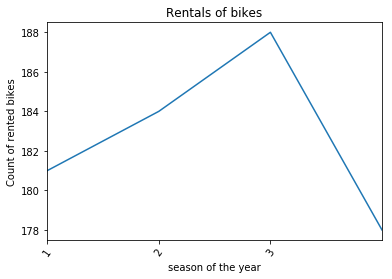

In [54]:
rentels_weekday =dt.groupby('season').size()
plot_day = rentels_weekday.plot(title='Rentals of bikes',xticks=(range(1,4)),rot=55)
plot_day.set_xlabel('season of the year')
plot_day.set_ylabel('Count of rented bikes')

mnth
1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
dtype: int64


Text(0, 0.5, 'count of bikes Rented')

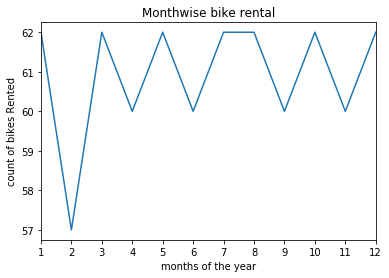

In [55]:
#Bike Rentals Monthly
sales_month = dt.groupby('mnth').size()
print(sales_month)
#Plotting the Graph
plot_month = sales_month.plot(title='Monthwise bike rental',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_month.set_xlabel('months of the year')
plot_month.set_ylabel('count of bikes Rented')

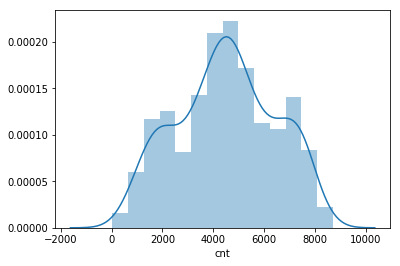

In [56]:
#count distribution
sns.distplot(dt['cnt'])

In [57]:
#Converting redpective variables to required data format 
dt['dteday'] = pd.to_datetime(dt['dteday'],yearfirst=True)
dt['season'] = dt['season'].astype('category')
dt['yr'] = dt['yr'].astype('category')
dt['mnth'] = dt['mnth'].astype('category')
dt['holiday'] = dt['holiday'].astype('category')
dt['weekday'] = dt['weekday'].astype('category')
dt['workingday'] = dt['workingday'].astype('category')
dt['weathersit'] = dt['weathersit'].astype('category')

In [58]:
#Performing the feature Engineering
#Converting the normalized variable values as given in the data set
dt['temp']=dt['temp']*39
dt['atemp']=dt['atemp']*50
dt['windspeed']=dt['windspeed']*67
dt['hum']=dt['hum']*100

In [59]:
#----------categorising the variables from the above EDA----------
#Continious Variable
var_cont=["temp","atemp","hum","windspeed","casual","registered","cnt"]
#categorical Variables
var_categorical=["season","yr","mnth","holiday","weekday","workingday","weathersit"]

# ---------------------------------Pre-Processing--------------------

# Missing Value Analysis

In [60]:
#Checking all the variables for the missing values
#At first we are cratin a dataframe to analyse missing percentage
missed_val = pd.DataFrame(dt.isnull().sum())

#reseting the index of the data frame
missed_val = missed_val.reset_index()

#renaming  the variable
missed_val = missed_val.rename(columns = {'index': 'Variables', 0: 'Missed_val_percentage'})

#calculating missed value percentage
missed_val['Missed_val_percentage'] = (missed_val['Missed_val_percentage']/len(dt))*100

#descending order
missed_val = missed_val.sort_values('Missed_val_percentage', ascending = False).reset_index(drop = True)


In [61]:
missed_val

,Variables,Missed_val_percentage
0,dteday,0.0
1,season,0.0
2,yr,0.0
3,mnth,0.0
4,holiday,0.0
5,weekday,0.0
6,workingday,0.0
7,weathersit,0.0
8,temp,0.0
9,atemp,0.0


In [62]:
#As there are no missing values we move further to Outlier Analysis

# Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc1b86b390>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc1b86ba58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc1b86b240>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc1b875128>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc1b875470>],
 'means': []}

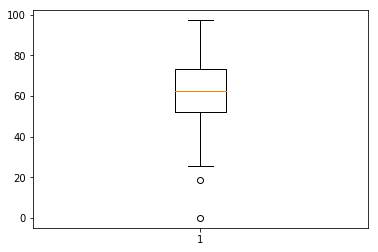

In [63]:
%matplotlib inline
plt.boxplot(dt['hum'])

#Negetive outlier found in hum

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc1b8bdb38>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc1b8ca208>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc1b8bd9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc1b8ca898>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc1b8cabe0>],
 'means': []}

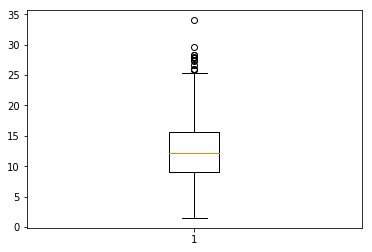

In [64]:
%matplotlib inline
plt.boxplot(dt['windspeed'])

#Positive outliers found in windspeed

In [65]:
#Detecting & Delete Outliers
for i in var_cont :
    #print (i)
    q75,q25 = np.percentile(dt.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    #print (min)
    #print (max)
    
    dt = dt.drop(dt[dt.loc[:,i] < min].index)
    dt = dt.drop(dt[dt.loc[:,i] > max].index)   

# Performing Variable Selection

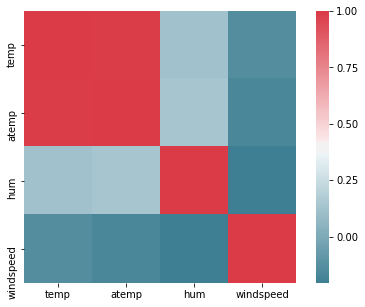

In [66]:
##Feature selection o the basis of various features like correlation, multicollinearity.
vars = ["dteday","yr","season","mnth","workingday","weekday","weathersit","temp","atemp","hum","windspeed"]

#Correlation Plot
dt_corr = dt.loc[:,vars]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corrr = dt_corr.corr()

#Plot using seaborn library
sns.heatmap(corrr, mask=np.zeros_like(corrr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [67]:
from scipy.stats import chi2_contingency
for i in var_categorical:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(dt['cnt'], dt[i]))
    print(dof)

season
1941
yr
647
mnth
7117
holiday
647
weekday
3882
workingday
647
weathersit
1294


In [68]:
#As we can see we will be removing variable atemp beacuse it is highly correlated with temp
# And also removing holiday because they don't contribute much

dt = dt.drop(['atemp','holiday'], axis =1)

# Model Development

In [69]:
#Divide data into train and test
X = dt.values[:,1:11]
Y = dt.values[:,11]

X_train,y_train,X_test,y_test = train_test_split( X, Y, test_size = 0.2)

# -----Random Forest Model(best suited)

In [70]:
#AS we have discussed in the R also the RandomForest model suits the most for the problem
model_rf = RandomForestRegressor(n_estimators = 1000, random_state = 1337)
# Train the model on training data
model_rf.fit(X_train, X_test);

# Use the forest's predict method on the test data
predictions = model_rf.predict(y_train)
# Calculate the absolute errors
err = abs(predictions - y_test)

In [71]:
# For analyzing the accuracy we calculated mean absolute percentage error (MAPE) 
mape = 100 * (err / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 84.0 %.
